In [1]:
import pandas as pd
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
%%time
import pandas as pd
import re
import string
#!pip install nltk
#!pip install spacy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

CPU times: user 1.66 ms, sys: 1.26 ms, total: 2.92 ms
Wall time: 1.58 ms


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
%%time
from pandarallel import pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
CPU times: user 15.9 ms, sys: 2.87 ms, total: 18.8 ms
Wall time: 18.1 ms


### NER

In [4]:
import pickle

# Open the pickle file in binary mode
with open('positive_sent_articles.pkl', 'rb') as file:
    # Load the object from the pickle file
    df_p = pickle.load(file)

df = df_p

In [5]:
df.head()

,year_month,title,clean_text,prob_pos,date,year
0,2020-01,"\r \tInsilico, Pfizer to jointly explore novel...","Insilico, Pfizer to jointly explore novel data...",0.722864,2020-01-01,2020
1,2020-01,\r \tIsraeli data science platform co Iguazio ...,Israeli data science platform for real time ma...,0.794515,2020-01-01,2020
2,2020-01,\r \tStudy demonstrates accuracy of AI system ...,Study demonstrates accuracy of AI system in di...,0.527837,2020-01-01,2020
3,2020-01,\r \r \r Blow Molding: Online ...,Blow Molding: Online PET Preform Inspection Us...,0.642190,2020-01-01,2020
4,2020-01,\r Irish AI firm announces new collabo...,Registered in Ireland: . Everseen’s retail tec...,0.579075,2020-01-01,2020


In [6]:
#!pip install spacy

In [7]:
df = df.sample(5000,random_state=42)

In [8]:
#!python -m spacy download en_core_web_sm

In [9]:
%%time

import pandas as pd
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

entities = []
labels = []
position_start = []
position_end = []

# Iterate over each text in the 'clean_text' column
for text in df['clean_text']:
    # Apply spaCy NLP pipeline to extract entities
    doc = nlp(text)
    
    # Extract entity details and append to respective lists
    for ent in doc.ents:
        entities.append(ent.text)
        labels.append(ent.label_)
        position_start.append(ent.start_char)
        position_end.append(ent.end_char)
        
# Create a new DataFrame from the extracted entity details
entity_df = pd.DataFrame({'Entities': entities, 'Labels': labels, 'Position_Start': position_start, 'Position_End': position_end})

2023-05-25 22:46:50.119179: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 22:46:51.132957: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


CPU times: user 10min 13s, sys: 3.26 s, total: 10min 16s
Wall time: 10min 17s


In [10]:
# Write the filtered_news dataframe to a parquet file
entity_df.to_parquet('pos_articles_top_mod.parquet')

In [11]:
#!python -m spacy download en_core_web_lg
#!python -m spacy download en_core_web_md

In [12]:
# Print the first 20 rows of the entity DataFrame
entity_df.head(20)

,Entities,Labels,Position_Start,Position_End
0,AI,ORG,305,307
1,AI,ORG,494,496
2,Get Brochure of the Report @,ORG,505,533
3,AI,ORG,598,600
4,digital,ORG,652,659
5,AI,ORG,839,841
6,AI,ORG,1020,1022
7,NLU,ORG,1065,1068
8,ML,ORG,1073,1075
9,AI,ORG,1233,1235


In [13]:
# Extract top organizations
top_organizations = entity_df[entity_df['Labels'] == 'ORG']['Entities'].value_counts().head(50)

# Extract top locations
top_locations = entity_df[entity_df['Labels'] == 'GPE']['Entities'].value_counts().head(50)

In [17]:
# Print the top organizations
print("Top Organizations:")
top_organizations.head(10)

Top Organizations:


AI                             22158
Gray Media Group                4236
PRNewswire                      1636
ML                              1415
Google                          1373
Artificial Intelligence         1342
Microsoft                       1300
IBM                              958
NVIDIA                           558
the Artificial Intelligence      557
Name: Entities, dtype: int64

In [15]:
# Print the top locations
print("Top Locations:")
print(top_locations)

Top Locations:
US                   1320
India                1154
China                1032
OpenAI                934
U.S.                  866
Japan                 678
Canada                589
UK                    560
Us                    529
France                442
Germany               422
the United States     354
AI                    348
New York              317
Australia             315
LinkedIn              290
Italy                 290
Brazil                286
Russia                274
Mexico                256
California            248
Texas                 239
Korea                 231
United States         221
London                205
America               195
Israel                192
San Francisco         185
South Korea           180
Egypt                 179
South Africa          178
USA                   167
Spain                 163
Singapore             161
Calif.                158
Saudi Arabia          155
Dallas                150
Taiwan                1

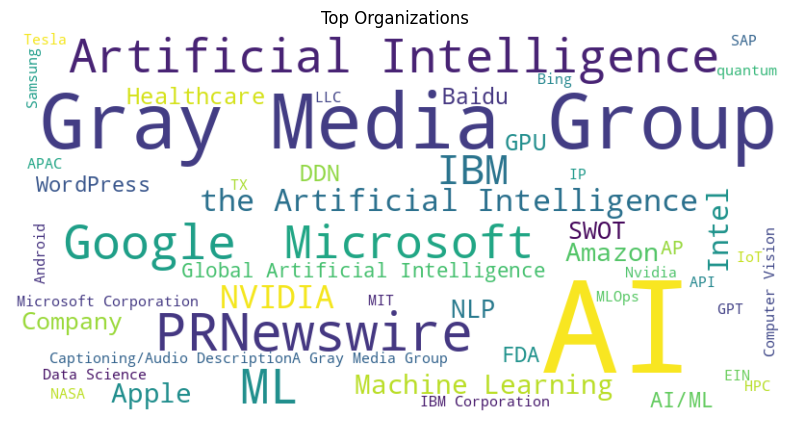

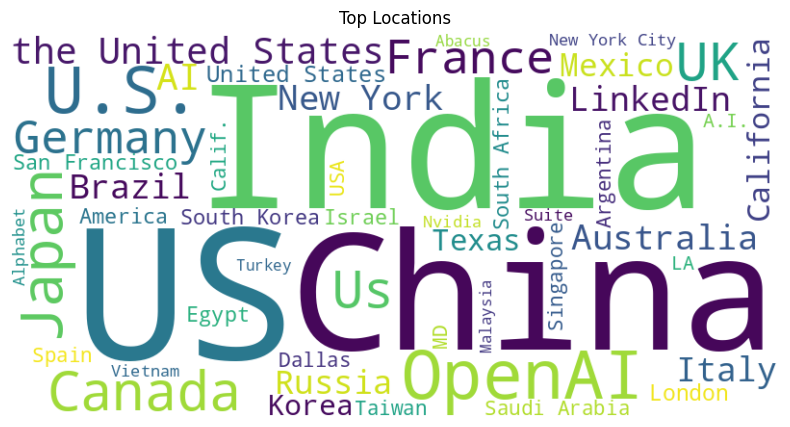

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Top organizations
organizations_data = top_organizations.index.tolist()
organizations_counts = top_organizations.values.tolist()

organizations_wordcloud_data = dict(zip(organizations_data, organizations_counts))

organizations_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(organizations_wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(organizations_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Organizations')
plt.show()

# Top locations
locations_data = top_locations.index.tolist()
locations_counts = top_locations.values.tolist()

locations_wordcloud_data = dict(zip(locations_data, locations_counts))

locations_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(locations_wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(locations_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Locations')
plt.show()